In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printed

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
tf.random.set_seed(0)

### 1. Load data
- set the load data row number
- set colunms names
- remove useless colunms

In [3]:
row_num = 35000
test_num= 5000

In [4]:
dos_data = pd.read_csv("data/DoS_dataset.csv",nrows=row_num,header=None)

In [5]:
col_names = ['time_stamp','id', 'dlc','d0','d1','d2','d3','d4','d5','d6','d7','R']
dos_data = dos_data.dropna()

In [6]:
dos_data.columns = col_names

In [7]:
dos_data.head()

,time_stamp,id,dlc,d0,d1,d2,d3,d4,d5,d6,d7,R
0,1.478198e+09,0316,8,05,21,68,09,21,21,00,6f,R
1,1.478198e+09,018f,8,fe,5b,00,00,00,3c,00,00,R
2,1.478198e+09,0260,8,19,21,22,30,08,8e,6d,3a,R
3,1.478198e+09,02a0,8,64,00,9a,1d,97,02,bd,00,R
4,1.478198e+09,0329,8,40,bb,7f,14,11,20,00,14,R


In [8]:
dos_data.tail()

,time_stamp,id,dlc,d0,d1,d2,d3,d4,d5,d6,d7,R
34995,1.478198e+09,02c0,8,14,00,00,00,00,00,00,00,R
34996,1.478198e+09,0350,8,05,20,64,68,77,00,00,5e,R
34997,1.478198e+09,0002,8,00,00,00,00,00,03,0f,65,R
34998,1.478198e+09,0153,8,00,21,10,ff,00,ff,00,00,R
34999,1.478198e+09,0130,8,27,80,00,ff,e7,7f,0f,c4,R


We can remove the dlc and R colunms because they do not hold any useful information.

In [9]:
dos_data = dos_data.drop(['time_stamp', 'dlc','R'], axis=1)

In [10]:
# dos_data[1:30].values

### 2. Create features
convert consequtive records into matrix freature according to [paper](https://www.sciencedirect.com/science/article/abs/pii/S2214209619302451)

Note: we use integer instead of binary in this notebook

In [11]:
def create_feature(data_frame,label,n=30,m=9):
    feature_list = []
    nrow = data_frame.shape[0]
    for col  in dos_data.columns:
        data_frame[col] = data_frame[col].apply(int, base=16)
    for i in range(0,nrow,n):
        if nrow >=  i+n:
            tem_file = data_frame.iloc[i:i+n,:].values
            feature_list.append(tem_file)
    feature_df = pd.DataFrame(data={"features":feature_list,"label":[label]*len(feature_list)})
    return feature_df

In [12]:
dos_feature_df = create_feature(dos_data,"dos")    

In [13]:
dos_feature_df.shape

(1157, 2)

In [14]:
dos_feature_df.shape[1]

2

In [15]:
dos_feature_df.head()

,features,label
0,"[[790, 5, 33, 104, 9, 33, 33, 0, 111], [399, 2...",dos
1,"[[304, 11, 128, 0, 255, 69, 128, 12, 133], [30...",dos
2,"[[1349, 216, 0, 0, 136, 0, 0, 0, 0], [1072, 0,...",dos
3,"[[790, 5, 34, 96, 9, 34, 33, 0, 111], [399, 25...",dos
4,"[[304, 24, 128, 0, 255, 14, 128, 1, 186], [305...",dos


In [16]:
from PIL import Image
from IPython.display import display

In [17]:
img = Image.fromarray(dos_feature_df.features[0], 'L')
display(img)

### 3. Repeat the above operations on the rest of dataset

In [18]:
fuzzy_data = pd.read_csv("data/Fuzzy_dataset.csv",nrows=row_num,sep=',',header=None)
fuzzy_data.columns = col_names
fuzzy_data = fuzzy_data.dropna()
fuzzy_data = fuzzy_data.drop(['time_stamp', 'dlc','R'], axis=1)
fuzzy_feature_df = create_feature(fuzzy_data,"fuzzy")
fuzzy_feature_df.head()

,features,label
0,"[[1349, 216, 0, 0, 138, 0, 0, 0, 0], [2, 0, 0,...",fuzzy
1,"[[880, 0, 32, 0, 0, 0, 0, 0, 0], [1087, 16, 64...",fuzzy
2,"[[339, 0, 33, 16, 255, 0, 255, 0, 0], [2, 0, 0...",fuzzy
3,"[[672, 4, 0, 153, 29, 151, 2, 189, 0], [809, 6...",fuzzy
4,"[[1087, 16, 64, 96, 255, 125, 136, 9, 0], [108...",fuzzy


In [19]:
gear_data = pd.read_csv("data/gear_dataset.csv",nrows=row_num,sep=',',header=None)
gear_data.columns = col_names
gear_data = gear_data.dropna()
gear_data = gear_data.drop(['time_stamp', 'dlc','R'], axis=1)
gear_feature_df = create_feature(gear_data,"gear")
gear_feature_df.head()


,features,label
0,"[[320, 0, 0, 0, 0, 16, 41, 42, 36], [704, 21, ...",gear
1,"[[497, 8, 0, 0, 0, 0, 0, 0, 0], [339, 0, 33, 1...",gear
2,"[[399, 254, 80, 0, 0, 0, 60, 0, 0], [608, 25, ...",gear
3,"[[880, 0, 32, 0, 0, 0, 0, 0, 0], [848, 5, 32, ...",gear
4,"[[339, 0, 33, 16, 255, 0, 255, 0, 0], [672, 96...",gear


In [20]:
rpm_data = pd.read_csv("data/RPM_dataset.csv",nrows=row_num,sep=',',header=None)
rpm_data.columns = col_names
rpm_data = rpm_data.dropna()
rpm_data = rpm_data.drop(['time_stamp', 'dlc','R'], axis=1)
rpm_feature_df = create_feature(rpm_data,"rpm")
rpm_feature_df.head()


,features,label
0,"[[790, 5, 34, 104, 9, 34, 32, 0, 117], [399, 2...",rpm
1,"[[305, 251, 127, 0, 0, 56, 127, 10, 65], [320,...",rpm
2,"[[704, 21, 0, 0, 0, 0, 0, 0, 0], [1072, 0, 0, ...",rpm
3,"[[848, 5, 32, 132, 104, 115, 0, 0, 186], [790,...",rpm
4,"[[304, 11, 128, 0, 255, 31, 128, 15, 213], [30...",rpm


On linux run the follow code to coverte txt file format to csv file

Orginal format:

Timestamp: 1479121500.969313        ID: 0140    000    DLC: 8    00 00 00 00 1a 00 24 ee

Expected format:

1479121500.969313,0140,8,00,00,00,00,1a,00,24,ee


- `sed -i 's/Timestamp: //g' normal_run_data.txt`
- `sed -i 's/        ID: /,/g' normal_run_data.txt`
- `sed -i 's/    000    DLC: /,/g' normal_run_data.txt`
- `sed -i 's/    /,/g' normal_run_data.txt`

In [21]:
norm_data = pd.read_csv("data/normal_run_data.txt",nrows=row_num,sep=',',header=None)
norm_data.columns = col_names[:11]
norm_data = norm_data.dropna()
norm_data = norm_data.drop(['time_stamp', 'dlc'], axis=1)
norm_data_df = create_feature(norm_data,"norm")
norm_data_df.head()

,features,label
0,"[[848, 5, 40, 132, 102, 109, 0, 0, 162], [704,...",norm
1,"[[672, 0, 0, 107, 29, 1, 4, 221, 0], [809, 135...",norm
2,"[[305, 242, 127, 0, 0, 48, 127, 3, 55], [320, ...",norm
3,"[[1088, 255, 0, 0, 0, 255, 106, 8, 0], [704, 2...",norm
4,"[[672, 32, 0, 107, 29, 1, 4, 221, 0], [790, 5,...",norm


### 4. Combine the loaded datasets

In [22]:
final_data = pd.concat([dos_feature_df,fuzzy_feature_df,gear_feature_df,rpm_feature_df,norm_data_df],ignore_index = True)
final_data.head()

,features,label
0,"[[790, 5, 33, 104, 9, 33, 33, 0, 111], [399, 2...",dos
1,"[[304, 11, 128, 0, 255, 69, 128, 12, 133], [30...",dos
2,"[[1349, 216, 0, 0, 136, 0, 0, 0, 0], [1072, 0,...",dos
3,"[[790, 5, 34, 96, 9, 34, 33, 0, 111], [399, 25...",dos
4,"[[304, 24, 128, 0, 255, 14, 128, 1, 186], [305...",dos


In [23]:
final_data.tail()

,features,label
5661,"[[339, 0, 0, 0, 255, 0, 255, 0, 0], [2, 0, 0, ...",norm
5662,"[[672, 64, 0, 107, 29, 1, 4, 221, 0], [809, 64...",norm
5663,"[[1264, 0, 27, 0, 128, 0, 79, 3, 20], [704, 20...",norm
5664,"[[1349, 216, 180, 0, 142, 0, 0, 0, 0], [2, 0, ...",norm
5665,"[[399, 254, 52, 0, 0, 0, 98, 0, 0], [608, 25, ...",norm


In [24]:
from sklearn.utils import shuffle

In [25]:
final_data = shuffle(final_data)
final_data.head()

,features,label
3933,"[[672, 32, 0, 131, 29, 150, 2, 189, 0], [790, ...",rpm
5185,"[[848, 5, 40, 84, 102, 109, 0, 0, 114], [2, 0,...",norm
3504,"[[880, 0, 32, 0, 0, 0, 0, 0, 0], [790, 69, 41,...",rpm
4980,"[[320, 0, 0, 0, 0, 20, 32, 45, 103], [1264, 0,...",norm
4124,"[[399, 254, 59, 0, 0, 0, 60, 0, 0], [608, 25, ...",rpm


In [26]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
transfomed_label = encoder.fit_transform(final_data.label)

In [27]:
# transfomed_label = transfomed_label.astype(np.float32)

In [28]:
a = dos_feature_df.features[0]
a.shape

(30, 9)

In [29]:
from tensorflow.keras.layers import Input,Conv1D,Dropout,MaxPooling1D,Flatten,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import concatenate

In [30]:
n_time_steps = 30
n_features = 9
n_epoch = 150

In [31]:
(n_features,n_time_steps)

(9, 30)

In [32]:
model = Sequential([
# Input((n_time_steps,9)),
Conv1D(input_shape=(n_time_steps,n_features),filters=16, kernel_size=3,activation='relu'),
Conv1D(filters=16, kernel_size=3,activation='relu'),
# Conv1D(filters=32, kernel_size=3,activation='relu'),
MaxPooling1D(pool_size=16),

Flatten(),
Dense(8, activation='relu'),
#   tf.keras.layers.Dense(4, activation='relu'),
# Dropout(0.2),
Dense(5, activation='softmax')
])


model.compile(optimizer='adam',

          loss='categorical_crossentropy',

          metrics=['categorical_accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 28, 16)            448       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 26, 16)            784       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 16)             0         
_________________________________________________________________
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 8)                 136       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
Total params: 1,413
Trainable params: 1,413
Non-trainable params: 0
______________________________________________________

In [34]:
features = np.concatenate(final_data.features.values)
features = features.reshape(-1,n_time_steps,n_features)

In [35]:
features.shape

(5666, 30, 9)

In [2]:
history = model.fit(features[:test_num], transfomed_label[:test_num], epochs=n_epoch, batch_size=64,
                    validation_data=(features[test_num:], transfomed_label[test_num:]))

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

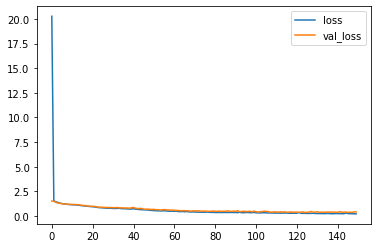

In [38]:
x = list(range(n_epoch))
plt.plot(x, history.history['loss'],label="loss")
plt.plot(x, history.history['val_loss'],label="val_loss")
plt.legend();

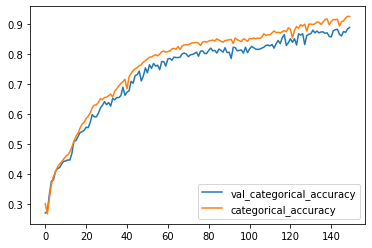

In [39]:
plt.plot(x, history.history['val_categorical_accuracy'],label="val_categorical_accuracy")
plt.plot(x, history.history['categorical_accuracy'],label="categorical_accuracy")
plt.legend();